<a href="https://colab.research.google.com/github/AsyrofiAnam/Data-Mining/blob/main/Clustering_Gempa_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Download Data Mentah dari USGS API

In [2]:
print("🔽 Mengunduh data gempa mentah dari USGS...")
url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query"
    "?format=csv"
    "&starttime=2020-01-01"
    "&endtime=2025-06-27"
    "&minmagnitude=4"
    "&maxmagnitude=9.5"
    "&minlatitude=-11.0"
    "&maxlatitude=6.0"
    "&minlongitude=95.0"
    "&maxlongitude=141.0"
)

df = pd.read_csv(url)
print(f"📊 Jumlah data total dari wilayah Indonesia & sekitarnya: {len(df)}")

# Simpan dulu data mentah (belum difilter)
raw_path = "gempa_indonesia_1900-2025.csv"
df.to_csv(raw_path, index=False)
print(f"💾 Data mentah disimpan di: {raw_path}")

🔽 Mengunduh data gempa mentah dari USGS...
📊 Jumlah data total dari wilayah Indonesia & sekitarnya: 11018
💾 Data mentah disimpan di: gempa_indonesia_1900-2025.csv


In [3]:
print("🔽 Mengunduh data gempa mentah dari USGS...")
url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query"
    "?format=csv"
    "&starttime=2010-01-01"
    "&endtime=2019-12-31"
    "&minmagnitude=4"
    "&maxmagnitude=9.5"
    "&minlatitude=-11.0"
    "&maxlatitude=6.0"
    "&minlongitude=95.0"
    "&maxlongitude=141.0"
)

df = pd.read_csv(url)
print(f"📊 Jumlah data total dari wilayah Indonesia & sekitarnya: {len(df)}")

raw_path = "gempa_indonesia_2010-2019.csv"
df.to_csv(raw_path, index=False)
print(f"💾 Data mentah disimpan di: {raw_path}")

🔽 Mengunduh data gempa mentah dari USGS...
📊 Jumlah data total dari wilayah Indonesia & sekitarnya: 18462
💾 Data mentah disimpan di: gempa_indonesia_2010-2019.csv


# Gabungkan Dataset

In [4]:
import pandas as pd

# Load masing-masing file
# df1 = pd.read_csv("gempa_indonesia_2000-2009.csv")
df2 = pd.read_csv("gempa_indonesia_2010-2019.csv")
df3 = pd.read_csv("gempa_indonesia_1900-2025.csv")

# Gabungkan semua data
df_all = pd.concat([df2, df3], ignore_index=True)

# Drop duplikat jika ada
df_all = df_all.drop_duplicates()

# Simpan ke file baru
df_all.to_csv("gempa_indonesia_2010_2025.csv", index=False)

# Tampilkan ringkasan
print("Jumlah total data setelah digabung:", len(df_all))
print("Contoh data:")
print(df_all.head())

Jumlah total data setelah digabung: 29480
Contoh data:
                       time  latitude  longitude   depth  mag magType  nst  \
0  2019-12-30T11:41:05.282Z    1.0735    97.3437   30.59  4.4      mb  NaN   
1  2019-12-29T14:20:37.242Z   -7.1989   129.5764  171.63  4.2      mb  NaN   
2  2019-12-29T13:53:26.587Z    4.4241   125.3342   10.00  4.3      mb  NaN   
3  2019-12-29T13:17:58.753Z    4.6994   125.2555   10.00  4.7      mb  NaN   
4  2019-12-29T13:08:55.896Z   -6.2539   130.4898  124.57  4.1      mb  NaN   

     gap   dmin   rms  ...                   updated  \
0  179.0  0.325  0.41  ...  2020-03-14T22:23:15.040Z   
1   82.0  1.876  1.25  ...  2020-03-14T22:23:31.040Z   
2  139.0  2.639  0.44  ...  2020-03-14T22:23:32.040Z   
3   92.0  2.376  0.72  ...  2020-03-14T22:23:32.040Z   
4   95.0  1.895  0.83  ...  2020-03-14T22:23:33.040Z   

                                 place        type horizontalError depthError  \
0     143 km SSW of Singkil, Indonesia  earthquake        

#LOAD & FILTER DATA GEMPA INDONESIA

In [5]:
# Load data
data = pd.read_csv("gempa_indonesia_2010_2025.csv")
print(f"Jumlah data awal: {len(data)}")

# Cek missing value di 4 kolom fitur utama
fitur = ['latitude', 'longitude', 'depth', 'mag']
missing_awal = data[fitur].isna().sum()
print("\nJumlah missing value sebelum dibersihkan:")
print(missing_awal)

# Drop baris yang mengandung NaN di keempat fitur utama
data = data.dropna(subset=fitur)
print(f"\nJumlah data setelah drop NA pada {fitur}: {len(data)}")

# Filter lokasi Indonesia dari kolom 'place'
data = data[data['place'].str.lower().str.contains("indonesia", na=False)].reset_index(drop=True)
print(f"Jumlah data setelah filter 'place' mengandung 'indonesia': {len(data)}")

# Tampilkan contoh data
print("\nContoh 5 data pertama:")
print(data[fitur + ['place']].head())

# Cek lagi apakah masih ada missing
print("\nMissing value setelah filtering:")
print(data[fitur].isna().sum())

Jumlah data awal: 29480

Jumlah missing value sebelum dibersihkan:
latitude     0
longitude    0
depth        0
mag          0
dtype: int64

Jumlah data setelah drop NA pada ['latitude', 'longitude', 'depth', 'mag']: 29480
Jumlah data setelah filter 'place' mengandung 'indonesia': 22915

Contoh 5 data pertama:
   latitude  longitude   depth  mag                             place
0    1.0735    97.3437   30.59  4.4  143 km SSW of Singkil, Indonesia
1   -7.1989   129.5764  171.63  4.2        Kepulauan Babar, Indonesia
2   -6.2539   130.4898  124.57  4.1     259 km WSW of Tual, Indonesia
3    3.1561   123.8185  409.28  4.5   217 km NNW of Manado, Indonesia
4   -0.0873   123.0675  111.52  4.3   69 km S of Gorontalo, Indonesia

Missing value setelah filtering:
latitude     0
longitude    0
depth        0
mag          0
dtype: int64


# PAIRPLOT

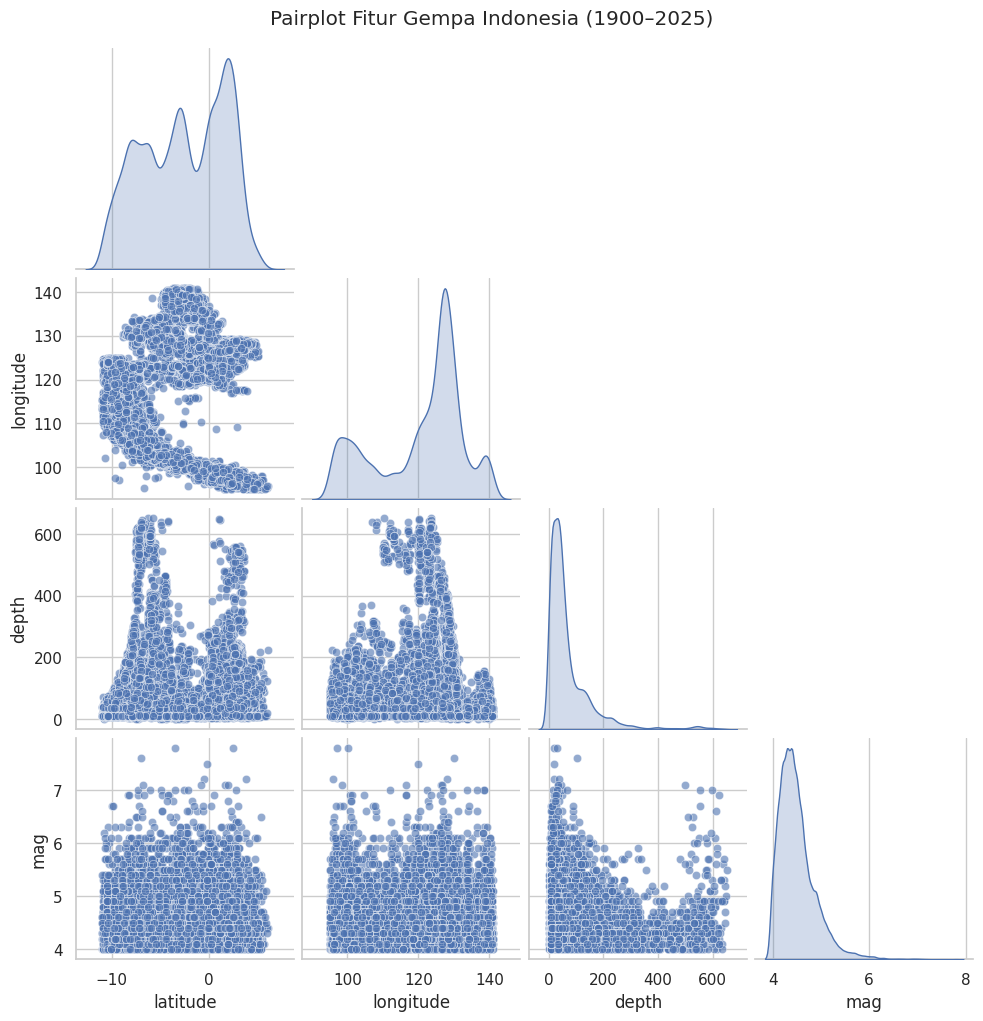

In [6]:
# Pastikan kolom tersedia dan tidak ada missing values
features = ['latitude', 'longitude', 'depth', 'mag']
data_pair = data[features].dropna()

sns.pairplot(data_pair, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot Fitur Gempa Indonesia (1900–2025)", y=1.02)
plt.show()

# KORELASI

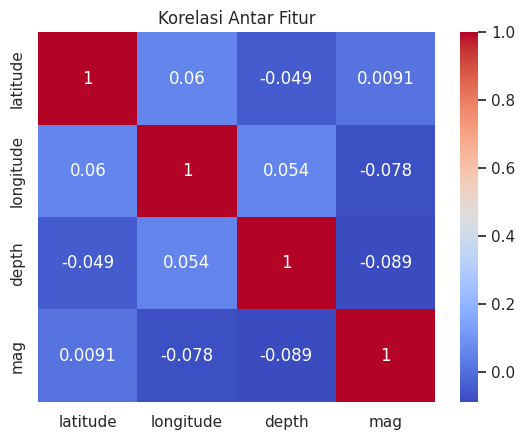

In [7]:
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

#PREPROCESSING & PCA

In [8]:
features = ['depth', 'mag']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#EVALUASI CLUSTERING FUNCTION

In [9]:
def evaluate_clustering(X_scaled, labels, name):
    if len(set(labels)) > 1:
        s = silhouette_score(X_scaled, labels)
        d = davies_bouldin_score(X_scaled, labels)
        c = calinski_harabasz_score(X_scaled, labels)
        print(f"\n{name} Evaluation:")
        print(f"Silhouette Score        : {s:.4f}")
        print(f"Davies-Bouldin Index    : {d:.4f}")
        print(f"Calinski-Harabasz Score : {c:.4f}")
        return s, d, c
    else:
        print(f"\n{name} menghasilkan hanya 1 cluster atau semua noise.")
        return None, None, None

#CLUSTERING: KMEANS

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
evaluate_clustering(X_scaled, labels_kmeans, "KMeans")


KMeans Evaluation:
Silhouette Score        : 0.4768
Davies-Bouldin Index    : 0.7619
Calinski-Harabasz Score : 17385.7696


(np.float64(0.4767839139588149),
 np.float64(0.7618913344665654),
 np.float64(17385.769577945703))

#CLUSTERING: GAUSSIAN MIXTURE MODEL (GMM)

In [11]:
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
evaluate_clustering(X_scaled, labels_gmm, "Gaussian Mixture Model")


Gaussian Mixture Model Evaluation:
Silhouette Score        : 0.3442
Davies-Bouldin Index    : 0.9691
Calinski-Harabasz Score : 10481.5133


(np.float64(0.3442034755796035),
 np.float64(0.969130161665849),
 np.float64(10481.513284204215))

#CLUSTERING: FUZZY C-MEANS

In [12]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


In [13]:
import skfuzzy as fuzz

X_fuzzy = X_scaled.T
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_fuzzy, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)
labels_fcm = np.argmax(u, axis=0)
print(f"\nFuzzy C-Means Evaluation:\nFuzzy Partition Coefficient (FPC): {fpc:.4f}")
evaluate_clustering(X_scaled, labels_fcm, "Fuzzy C-Means")


Fuzzy C-Means Evaluation:
Fuzzy Partition Coefficient (FPC): 0.6980

Fuzzy C-Means Evaluation:
Silhouette Score        : 0.4709
Davies-Bouldin Index    : 0.7795
Calinski-Harabasz Score : 16540.0438


(np.float64(0.4708632475605388),
 np.float64(0.7794820950577175),
 np.float64(16540.043770899552))

# Visualisasi PCA

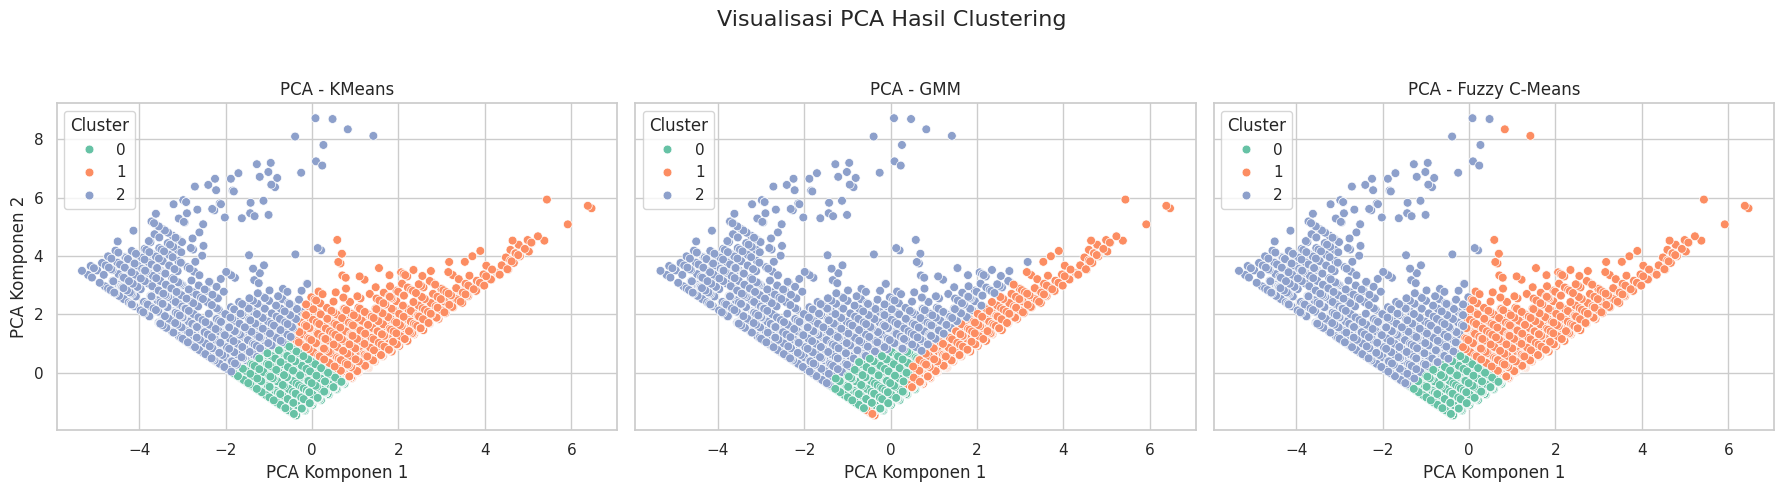

In [14]:
# Siapkan palet warna yang konsisten
palette = 'Set2'

# Buat 3 subplot dalam 1 baris
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

# KMeans
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_kmeans,
    palette=palette,
    s=40,
    ax=axes[0]
)
axes[0].set_title("PCA - KMeans")
axes[0].set_xlabel("PCA Komponen 1")
axes[0].set_ylabel("PCA Komponen 2")
axes[0].legend(title="Cluster")
axes[0].grid(True)

# GMM
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_gmm,
    palette=palette,
    s=40,
    ax=axes[1]
)
axes[1].set_title("PCA - GMM")
axes[1].set_xlabel("PCA Komponen 1")
axes[1].set_ylabel("")  # Kosongkan label Y biar rapi
axes[1].legend(title="Cluster")
axes[1].grid(True)

# Fuzzy C-Means
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_fcm,
    palette=palette,
    s=40,
    ax=axes[2]
)
axes[2].set_title("PCA - Fuzzy C-Means")
axes[2].set_xlabel("PCA Komponen 1")
axes[2].set_ylabel("")  # Kosongkan label Y biar rapi
axes[2].legend(title="Cluster")
axes[2].grid(True)

# Atur tata letak
plt.suptitle("Visualisasi PCA Hasil Clustering", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Visualisasi Mapping

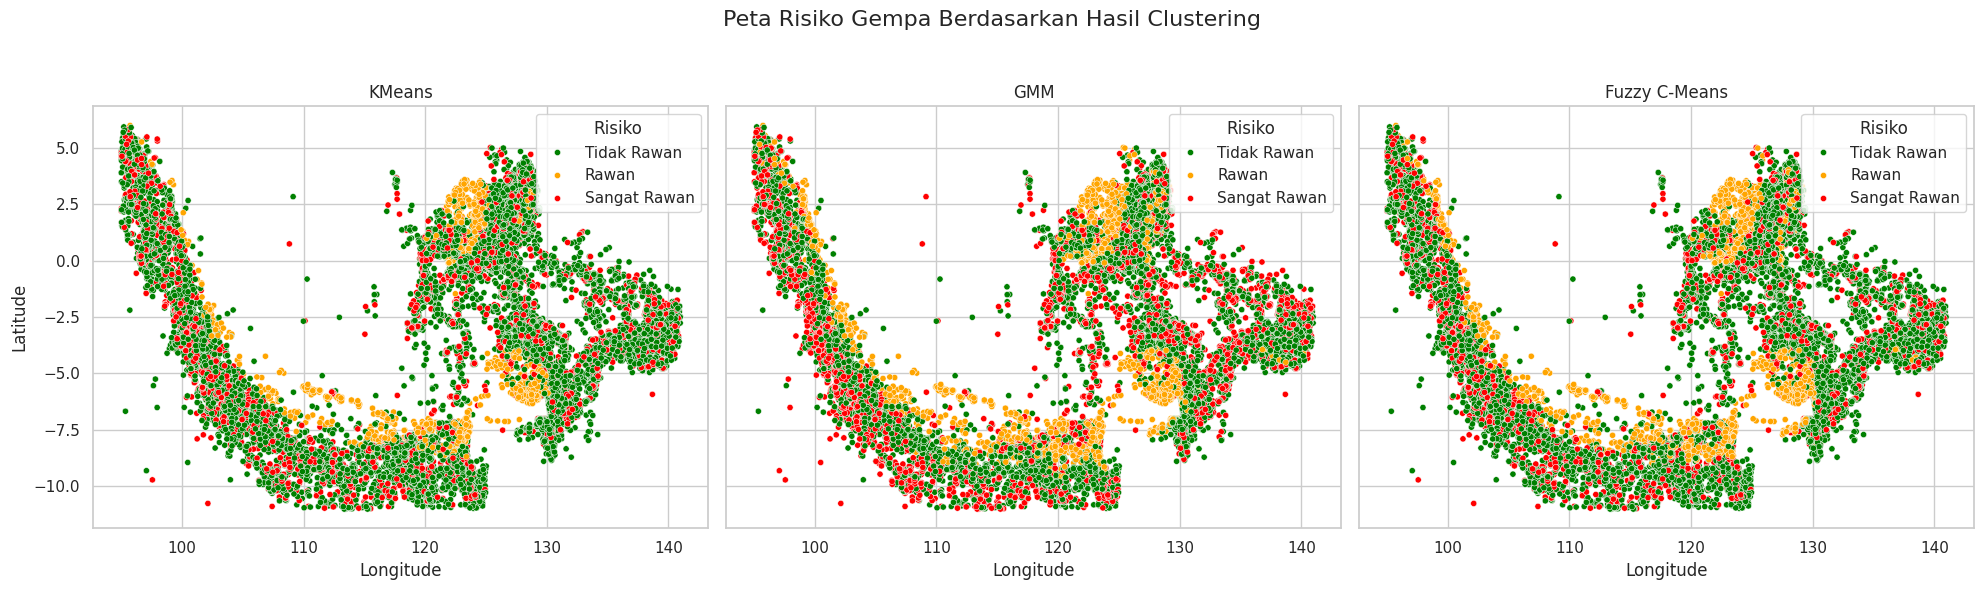

In [15]:
# Mapping Risiko berdasarkan Magnitudo tiap cluster
risk_label = {0: 'Tidak Rawan', 1: 'Rawan', 2: 'Sangat Rawan'}
risk_color = {'Tidak Rawan': 'green', 'Rawan': 'orange', 'Sangat Rawan': 'red'}

# KMeans
data['Cluster_KMeans'] = labels_kmeans
kmeans_mean = data.groupby('Cluster_KMeans')['mag'].mean().sort_values()
kmeans_map = {cluster: i for i, cluster in enumerate(kmeans_mean.index)}
data['Risk_KMeans'] = data['Cluster_KMeans'].map(kmeans_map).map(risk_label)

# GMM
data['Cluster_GMM'] = labels_gmm
gmm_mean = data.groupby('Cluster_GMM')['mag'].mean().sort_values()
gmm_map = {cluster: i for i, cluster in enumerate(gmm_mean.index)}
data['Risk_GMM'] = data['Cluster_GMM'].map(gmm_map).map(risk_label)

# FCM
data['Cluster_FCM'] = labels_fcm
fcm_mean = data.groupby('Cluster_FCM')['mag'].mean().sort_values()
fcm_map = {cluster: i for i, cluster in enumerate(fcm_mean.index)}
data['Risk_FCM'] = data['Cluster_FCM'].map(fcm_map).map(risk_label)

# 2. Plot 3 Peta dalam 1 Frame (pakai huruf kecil: 'longitude' dan 'latitude')
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

# Peta 1 - KMeans
sns.scatterplot(
    data=data,
    x='longitude', y='latitude',
    hue='Risk_KMeans',
    palette=risk_color,
    s=20, ax=axes[0]
)
axes[0].set_title("KMeans")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(True)
axes[0].legend(title="Risiko")

# Peta 2 - GMM
sns.scatterplot(
    data=data,
    x='longitude', y='latitude',
    hue='Risk_GMM',
    palette=risk_color,
    s=20, ax=axes[1]
)
axes[1].set_title("GMM")
axes[1].set_xlabel("Longitude")
axes[1].grid(True)
axes[1].legend(title="Risiko")

# Peta 3 - Fuzzy C-Means
sns.scatterplot(
    data=data,
    x='longitude', y='latitude',
    hue='Risk_FCM',
    palette=risk_color,
    s=20, ax=axes[2]
)
axes[2].set_title("Fuzzy C-Means")
axes[2].set_xlabel("Longitude")
axes[2].grid(True)
axes[2].legend(title="Risiko")

plt.suptitle("Peta Risiko Gempa Berdasarkan Hasil Clustering", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# SIMPAN HASIL

In [16]:
data['KMeans'] = labels_kmeans
data['GMM'] = labels_gmm
data['FuzzyCMeans'] = labels_fcm
data.to_csv("hasil_clustering_gempa_dengan_risiko.csv", index=False)